In [39]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os

from matplotlib.pyplot import title
from scipy.ndimage import label
from scipy.stats import alpha

In [21]:
# Importing all the yearly crime data into an array for storage
years = []
for i in range(2017, 2026, 1):
    years.append(i)

print(years)

crime_by_year = []
for year in years:
    filepath = os.path.join("..", "..", "Data", "Crime", f"Crime_Incidents_in_{year}.geojson")

    filepath = os.path.abspath(filepath)
    crime_by_year.append(gpd.read_file(filepath))


[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [22]:
# Categorizing crime

#crime25.head()
#print(crime25['OFFENSE'].unique())

violent_crime = ['HOMICIDE', 'SEX ABUSE', 'ASSAULT W/DANGEROUS WEAPON', 'ROBBERY']
property_crime = ['THEFT/OTHER', 'THEFT F/AUTO', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ARSON']
car_related_crime = ['MOTOR VEHICLE THEFT', 'THEFT F/AUTO']

In [26]:
# One-hot encode a column for violent_crime, property_crime and car_related_crime
for data in crime_by_year:
    # Violent Crime
    data['violent_crime'] = data['OFFENSE'].isin(violent_crime).astype(int)
    # Property Crime
    data['property_crime'] = data['OFFENSE'].isin(property_crime).astype(int)
    # Car Related Crime
    data['car_related_crime'] = data['OFFENSE'].isin(car_related_crime).astype(int)

#crime_by_year[0].head()

,CCN,REPORT_DAT,START_DATE,END_DATE,BLOCK,OFFENSE,METHOD,SHIFT,WARD,ANC,...,XBLOCK,YBLOCK,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID,geometry,violent_crime,property_crime,car_related_crime
0,09251904,2017-04-07 04:00:00+00:00,2009-02-13 17:03:45+00:00,2009-02-13 17:03:43+00:00,5800 - 5899 BLOCK OF 4TH STREET NW,HOMICIDE,OTHERS,MIDNIGHT,4,4B,...,398437.0,143648.0,38.960739,-77.018034,883486135,None,POINT (-77.01804 38.96075),1,0,0
1,14060710,2017-03-13 04:00:00+00:00,2014-05-01 23:32:00+00:00,2014-05-01 23:32:00+00:00,2000 - 2099 BLOCK OF FENWICK STREET NE,HOMICIDE,OTHERS,MIDNIGHT,5,5D,...,401305.0,138586.0,38.915139,-76.984953,883607159,None,POINT (-76.98495 38.91515),1,0,0
2,17000665,2017-01-02 02:12:36+00:00,2017-01-02 00:52:56+00:00,2017-01-02 02:12:35+00:00,1200 - 1299 BLOCK OF TRINIDAD AVENUE NE,BURGLARY,OTHERS,EVENING,5,5D,...,401174.0,137228.0,38.902906,-76.986465,883666972,None,POINT (-76.98647 38.90291),0,1,0
3,17000668,2017-01-02 03:24:00+00:00,2017-01-01 20:00:45+00:00,2017-01-01 20:30:57+00:00,600 - 799 BLOCK OF ATLANTIC STREET SE,THEFT/OTHER,OTHERS,EVENING,8,8E,...,400297.0,129240.0,38.830948,-76.996579,883666973,None,POINT (-76.99658 38.83096),0,1,0
4,17000672,2017-01-02 03:09:57+00:00,2017-01-02 01:30:43+00:00,2017-01-02 02:00:01+00:00,2000 - 2099 BLOCK OF 14TH STREET NW,THEFT/OTHER,OTHERS,EVENING,1,1B,...,397229.0,138854.0,38.917550,-77.031952,883666974,None,POINT (-77.03195 38.91756),0,1,0


In [30]:
# Collect crime count data by year into a df
counts_violent_crime = []
counts_property_crime = []
counts_car_related_crime = []

for data in crime_by_year:
    counts_violent_crime.append(data['violent_crime'].sum())
    counts_property_crime.append(data['property_crime'].sum())
    counts_car_related_crime.append(data['car_related_crime'].sum())

d = {'year': years,
     'violent_crime': counts_violent_crime,
     'property_crime': counts_property_crime,
     'car_related_crime': counts_car_related_crime}
agg_crime_data = pd.DataFrame(d)

In [31]:
agg_crime_data

,year,violent_crime,property_crime,car_related_crime
0,2017,4432,28662,12663
1,2018,4140,29706,14045
2,2019,4176,29793,12933
3,2020,4005,23926,11543
4,2021,4113,24208,12141
5,2022,3834,23328,11508
6,2023,5331,28904,14534
7,2024,3467,25830,11811
8,2025,2477,21673,9301


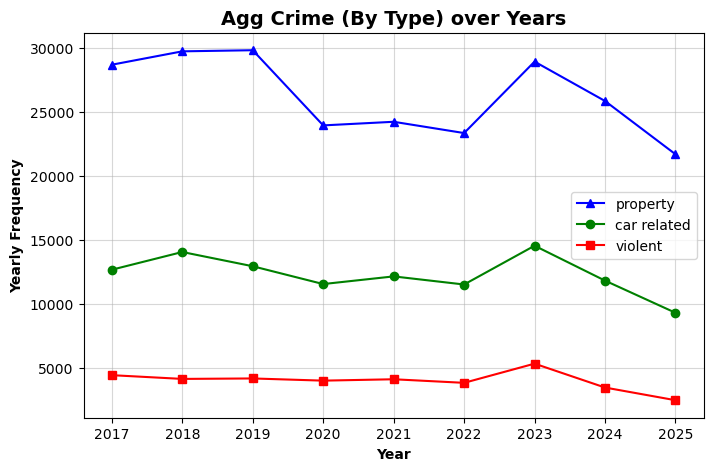

In [66]:
# Line graph for violent_crime, property_crime and car_related_crime counts over years
plt.figure(figsize = (8,5))
x = agg_crime_data['year']
plt.plot(x, agg_crime_data['property_crime'], 'b^-', label='property')
plt.plot(x, agg_crime_data['car_related_crime'], 'go-', label='car related')
plt.plot(x, agg_crime_data['violent_crime'], 'rs-', label='violent')
plt.legend()
plt.xlabel('Year', fontsize = 10, fontweight = 'bold')
plt.ylabel('Yearly Frequency', fontsize = 10, fontweight = 'bold')
plt.title('Agg Crime (By Type) over Years', fontsize = 14, fontweight = 'bold')
plt.grid(True, alpha = 0.5)
plt.show()